In [2]:
# 必要なパッケージを呼び出す
using Plots
using LaTeXStrings

In [3]:
# MATLABではグローバル変数を使って関数への変数受け渡しを行う
# Julia/Pythonではコンストラクタを用いる

# ギリシャ文字の使用は不可とする
struct Model{TI<:Integer, TF<:AbstractFloat}

    # カリブレーション
    alpha::TF 
    beta::TF           
    delta::TF 
    gamma::TF
    Abar::TF
    gbar::TF

    # 定常状態の値
    kss::TF
    css::TF
    Rss::TF    
    
    # 移行過程に関する変数
    T::TI

end

In [4]:
# カリブレーション
alpha = 0.33; 
beta = 0.95;
delta = 0.2; 
gamma = 2.0;
Abar = 1.0;
gbar = 0.2;

# 定常状態の値
kss = (alpha*beta*Abar/(1-beta*(1-delta)))^(1/(1-alpha));
css = kss^alpha - delta*kss - gbar;
Rss = 1-delta+alpha*Abar*kss^(alpha-1);

# 移行過程に関する変数
T = 100; 

# k の初期値
k0 = kss; 

#### 将来の消費増税の影響 (transition2_tauc.m に対応)

In [5]:
m = Model(alpha,beta,delta,gamma,Abar,gbar,kss,css,Rss,T);

# imaginary states
kvec0 = collect(range(k0,m.kss,m.T));
kvec1 = copy(kvec0);

tauc = zeros(m.T);
tauc[10:T] .= 0.2; 

cvec = zeros(m.T);
kvec = zeros(m.T);
rvec = zeros(m.T);
Rvec = zeros(m.T);

damp = 0.9;
diff = 1e+4;
crit = 1e-4;
iter = 0;

while diff > crit

    rvec = m.alpha .* m.Abar .* kvec0.^(m.alpha-1);
    wvec = (1-m.alpha) .* m.Abar .* kvec0.^m.alpha;

    cvec[m.T] = m.css;
    for i in m.T-1:-1:1
        cvec[i] = (1/m.beta/(1+rvec[i+1]-m.delta)*(1+tauc[i+1])/(1+tauc[i])*(cvec[i+1]^m.gamma))^(1/m.gamma);
    end

    kvec[1] = k0;
    for j in 1:m.T-1
        kvec[j+1] = rvec[j]*kvec0[j] + wvec[j] + (1-m.delta)*kvec[j] - m.gbar - cvec[j]; # k1,k2,...,kT
    end

    # update
    kvec1 = damp*kvec0 + (1-damp)*kvec;

    diff = maximum(abs.(kvec1-kvec0));
    kvec0 = copy(kvec1);
    iter += 1;

    # use the terminal condition as the criterion
    println([iter, diff])
    flush(stdout)

end

for t in 1:m.T-1
    Rvec[t] = ((1+tauc[t])/(1+tauc[t+1])) * (1-m.delta + m.alpha*m.Abar*kvec[t+1]^(m.alpha-1));
end

[1.0, 0.026552395087058756]


[2.0, 0.02295020416861604]


[3.0, 0.019645817883924277]


[4.0, 0.01664710543663328]


[5.0, 0.01395399825084831]


[6.0, 0.011559950984300515]


[7.0, 0.00945329008467155]


[8.0, 0.00761843956183883]


[9.0, 0.006037016521917904]


[10.0, 0.004688792382248952]


[11.0, 0.00355251925861233]


[12.0, 0.0026066244737463773]


[13.0, 0.0018579989923481754]


[14.0, 0.0019439688711178071]


[15.0, 0.001954611886738178]


[16.0, 0.0019321276480097627]


[17.0, 0.0018818422555335612]


[18.0, 0.001789316979506017]


[19.0, 0.0016675421063980789]


[20.0, 0.0015434517146064586]


[21.0, 0.001420492099510673]


[22.0, 0.0012874799735846931]


[23.0, 0.0011506433683974304]


[24.0, 0.0010148100057545406]


[25.0, 0.0008912568424652711]


[26.0, 0.0007819481310211707]


[27.0, 0.0006778409037149213]


[28.0, 0.0005806323425339155]


[29.0, 0.0004914044807220463]


[30.0, 0.00041074247583772205]


[31.0, 0.00033883863971984063]


[32.0, 0.0002755826899092373]


[33.0, 0.00022388023559427594]


[34.0, 0.00018081707957229298]


[35.0, 0.0001437372309016638]


[36.0, 0.00011222145471023737]


[37.0, 8.578679207937867e-5]


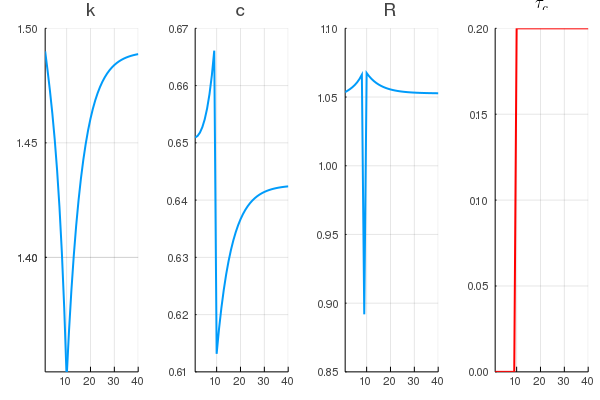

In [7]:
p1 = plot(kvec,title="k",ylims=(1.35,1.5),lw=2,legend=false);
p2 = plot(cvec,title="c",ylims=(0.61,0.67),lw=2,legend=false);
#p3 = plot(rvec.+1 .-m.delta,title="r",ylims=(1.05,1.07),lw=2,legend=false);
p3 = plot(Rvec,title="R",ylims=(0.85,1.1),lw=2,legend=false);
p4 = plot(tauc,title=L"\tau_{c}",ylims=(0,0.2),c=:red,lw=2,legend=false);

plot(p1,p2,p3,p4,xlims=(1,40),layout=(1,4),titlefontsize=12)